<a href="https://colab.research.google.com/github/descartesmbogning/patent-analysis/blob/main/patent_Innovation_Hotspots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk matplotlib wordcloud scikit-learn


In [ ]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from collections import Counter
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Downloads
nltk.download('wordnet')
nltk.download('stopwords')

# Initialize your stopwords set with wordcloud's stopwords
s = set(STOPWORDS)

# Get stopwords for all languages in NLTK
languages = stopwords.fileids()
for language in languages:
    s.update(stopwords.words(language))

# Add any additional stopwords if needed
s.add('amp')

# If you really need the resulting stopwords as a list:
stopwords_list = list(s)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Load your dataset (Assuming it's a CSV with a column 'abstract' for patent abstracts)

# import data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv ('/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/patent-phage-therapy-lens-23102023-tiab.csv')
#data = pd.read_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/topic_probability_patent_therapy_23102023_10.pkl').reset_index()
pd.set_option('display.max_columns', None)
print(len(data))
data.head()

2365


,#,Jurisdiction,Kind,Display Key,Lens ID,Publication Date,Publication Year,Application Number,Application Date,Priority Numbers,Earliest Priority Date,Title,Abstract,Applicants,Inventors,Owners,URL,Document Type,Has Full Text,Cites Patent Count,Cited by Patent Count,Simple Family Size,Extended Family Size,Sequence Count,CPC Classifications,IPCR Classifications,US Classifications,NPL Citation Count,NPL Resolved Citation Count,NPL Resolved Lens ID(s),NPL Resolved External ID(s),NPL Citations,Legal Status
0,1,RU,C2,RU 2214829 C2,069-390-611-717-343,2003-10-27,2003,RU 2001129920 A,2001-11-05,RU 2001129920 A,2001-11-05,METHOD FOR TUBERCULOSIS PHAGOTHERAPY,"FIELD: medicine, phthisiology. SUBSTANCE: meth...",NOVOSIB NII T;;UBERKULEZA,KURUNOV JU N;;KURUNOVA N N;;SHATALOVA N D,NaN,https://lens.org/069-390-611-717-343,Granted Patent,no,0,4,1,1,0,NaN,A61K35/76;;A61P31/06,NaN,0,0,NaN,NaN,NaN,EXPIRED
1,2,JP,A,JP 2016104011 A,114-759-028-882-736,2016-06-09,2016,JP 2015243657 A,2015-12-14,US 38401510 P,2010-09-17,"ANTIBACTERIAL PHAGES, PHAGE PEPTIDES AND USE M...",PROBLEM TO BE SOLVED: To provide novel bacteri...,TECNIFAR-INDUSTRIA TECNICA FARM S A;;TECHNOPHA...,MIGUEL ANGELO DA COSTA GARCIA;;CARLOS JORGE SO...,NaN,https://lens.org/114-759-028-882-736,Patent Application,no,1,1,48,48,1300,C12N2795/00032;;A61K31/505;;A61K31/7056;;A61K3...,C12N7/00;;A61K35/76;;A61P31/04;;C12N15/09,NaN,0,0,NaN,NaN,NaN,ACTIVE
2,3,AU,A1,AU 2015/255318 A1,094-982-928-461-863,2015-12-03,2015,AU 2015/255318 A,2015-11-13,AU 2015/255318 A;;AU 2010/211456 A;;US 2183450...,2009-02-06,"Antibacterial phage, phage peptides and method...",The present invention is directed to the field...,TECNIFAR INDÚSTRIA TÉCNICA FARMACÉUTICA S A;;T...,DA COSTA GARCIA MIGUEL ÂNGELO;;SOUSA DE SÃO JO...,"TECHNOPHAGE, INVESTIGACAO E DESENVOLVIMENTO EM...",https://lens.org/094-982-928-461-863,Patent Application,no,0,0,3,45,0,NaN,A61K35/76;;C12N9/14;;G01N33/569,NaN,0,0,NaN,NaN,NaN,ACTIVE
3,4,US,A1,US 2016/0022747 A1,167-908-891-122-112,2016-01-28,2016,US 201514852112 A,2015-09-11,US 201514852112 A;;US 201113148009 A;;PT 20100...,2009-02-06,"Antibacterial Phage, Phage Peptides and Method...",The present invention is directed to the field...,TECHNOPHAGE INVESTIGACAO E DESENVOLVIMENTO EM ...,DA COSTA GARCIA MIGUEL ANGELO;;SOUSA DE SAO JO...,TECHNOPHAGE INVESTIGACAO E DESENVOLVIMENTO EM ...,https://lens.org/167-908-891-122-112,Patent Application,yes,0,1,42,45,816,A61K38/00;;A61K45/06;;C07K14/005;;C12N7/00;;C1...,A61K35/76;;A61K9/00;;C12N7/00,NaN,0,0,NaN,NaN,NaN,ACTIVE
4,5,AU,A1,AU 2017/204331 A1,112-018-476-081-94X,2017-07-13,2017,AU 2017/204331 A,2017-06-26,AU 2017/204331 A;;AU 2015/255313 A;;AU 2011/30...,2011-09-19,"Antibacterial phage, phage peptides and method...",The present invention is directed to the field...,TECHNOPHAGE INVESTIGACAO E DESENVOLVIMENTO EM ...,DA COSTA GARCIA MIGUEL ANGELO;;SOUSA DE SAO JO...,NaN,https://lens.org/112-018-476-081-94X,Patent Application,no,0,3,1,1,0,Y02A50/30,A61K35/76;;C12N7/00,NaN,0,0,NaN,NaN,NaN,DISCONTINUED


# data preprocessing

In [ ]:
data['Application Date'] = pd.to_datetime(data['Application Date'])
data['Earliest Priority Date'] = pd.to_datetime(data['Earliest Priority Date'])

In [ ]:
data['Application Year'] = data['Application Date'].dt.year
data['Earliest Priority Year'] = data['Earliest Priority Date'].dt.year

In [ ]:
# Convert 'Publication Year' to integers
data['Publication Year'] = data['Publication Year'].astype('Int64')
data['Application Year'] = data['Application Year'].astype('Int64')
data['Earliest Priority Year'] = data['Earliest Priority Year'].astype('Int64')

In [ ]:
def group_years_in_ranges(df, col_name):
    bins = list(range(1960, 2026, 5))
    labels = [f"{i}-{i+4}" for i in bins[:-1]]
    return pd.cut(data['Application Year'], bins=bins, labels=labels, right=False)


In [ ]:
data['Application_Year_Range'] = group_years_in_ranges(data, 'Application Year')


In [ ]:
data['IPCR Classifications']

0                                    A61K35/76;;A61P31/06
1               C12N7/00;;A61K35/76;;A61P31/04;;C12N15/09
2                         A61K35/76;;C12N9/14;;G01N33/569
3                           A61K35/76;;A61K9/00;;C12N7/00
4                                     A61K35/76;;C12N7/00
                              ...                        
2360                                            C07H19/14
2361    C07H19/04;;C07H19/044;;C07H19/207;;C08F2/00;;C...
2362                                             C12Q1/68
2363     A21D2/00;;A23C9/12;;C12N1/00;;C12N1/12;;C12P1/00
2364    A61K39/00;;A61K39/29;;A61K39/295;;A61K39/385;;...
Name: IPCR Classifications, Length: 2365, dtype: object

In [ ]:
import pandas as pd

# Define the function to process IPCR codes
def process_ipcr_sections(ipcr_codes):
    # Check if ipcr_codes is a string (which means it's not NaN or None)
    if isinstance(ipcr_codes, str):
        # Extract the first letter of each code, remove duplicates by converting to a set
        unique_initials = sorted(set(code[0] for code in ipcr_codes.split(';;') if code))
        # Join the unique initials back together
        return ';;'.join(unique_initials)
    else:
        # If it's not a string, just return an empty string or NaN
        return ''

# Assuming 'data' is your DataFrame
# Apply the function to the 'IPCR Classifications' column
data['IPCR Sections'] = data['IPCR Classifications'].apply(process_ipcr_sections)

# Print the DataFrame to verify the results
data[['IPCR Classifications', 'IPCR Sections']]


,IPCR Classifications,IPCR Sections
0,A61K35/76;;A61P31/06,A
1,C12N7/00;;A61K35/76;;A61P31/04;;C12N15/09,A;;C
2,A61K35/76;;C12N9/14;;G01N33/569,A;;C;;G
3,A61K35/76;;A61K9/00;;C12N7/00,A;;C
4,A61K35/76;;C12N7/00,A;;C
...,...,...
2360,C07H19/14,C
2361,C07H19/04;;C07H19/044;;C07H19/207;;C08F2/00;;C...,C
2362,C12Q1/68,C
2363,A21D2/00;;A23C9/12;;C12N1/00;;C12N1/12;;C12P1/00,A;;C


In [ ]:
import pandas as pd

# Define the function to process IPCR codes
def process_ipcr_class(ipcr_codes):
    # Check if ipcr_codes is a string (which means it's not NaN or None)
    if isinstance(ipcr_codes, str):
        # Extract the first letter of each code, remove duplicates by converting to a set
        unique_initials = sorted(set(code[:3] for code in ipcr_codes.split(';;') if code))
        # Join the unique initials back together
        return ';;'.join(unique_initials)
    else:
        # If it's not a string, just return an empty string or NaN
        return ''

# Assuming 'data' is your DataFrame
# Apply the function to the 'IPCR Classifications' column
data['IPCR Class'] = data['IPCR Classifications'].apply(process_ipcr_class)

# Print the DataFrame to verify the results
data[['IPCR Classifications', 'IPCR Class']]


,IPCR Classifications,IPCR Class
0,A61K35/76;;A61P31/06,A61
1,C12N7/00;;A61K35/76;;A61P31/04;;C12N15/09,A61;;C12
2,A61K35/76;;C12N9/14;;G01N33/569,A61;;C12;;G01
3,A61K35/76;;A61K9/00;;C12N7/00,A61;;C12
4,A61K35/76;;C12N7/00,A61;;C12
...,...,...
2360,C07H19/14,C07
2361,C07H19/04;;C07H19/044;;C07H19/207;;C08F2/00;;C...,C07;;C08;;C12
2362,C12Q1/68,C12
2363,A21D2/00;;A23C9/12;;C12N1/00;;C12N1/12;;C12P1/00,A21;;A23;;C12


In [ ]:
import pandas as pd

# Define the function to process IPCR codes
def process_ipcr_subclass(ipcr_codes):
    # Check if ipcr_codes is a string (which means it's not NaN or None)
    if isinstance(ipcr_codes, str):
        # Extract the first letter of each code, remove duplicates by converting to a set
        unique_initials = sorted(set(code[:4] for code in ipcr_codes.split(';;') if code))
        # Join the unique initials back together
        return ';;'.join(unique_initials)
    else:
        # If it's not a string, just return an empty string or NaN
        return ''

# Assuming 'data' is your DataFrame
# Apply the function to the 'IPCR Classifications' column
data['IPCR Subclass'] = data['IPCR Classifications'].apply(process_ipcr_subclass)

# Print the DataFrame to verify the results
data[['IPCR Classifications', 'IPCR Subclass']]


,IPCR Classifications,IPCR Subclass
0,A61K35/76;;A61P31/06,A61K;;A61P
1,C12N7/00;;A61K35/76;;A61P31/04;;C12N15/09,A61K;;A61P;;C12N
2,A61K35/76;;C12N9/14;;G01N33/569,A61K;;C12N;;G01N
3,A61K35/76;;A61K9/00;;C12N7/00,A61K;;C12N
4,A61K35/76;;C12N7/00,A61K;;C12N
...,...,...
2360,C07H19/14,C07H
2361,C07H19/04;;C07H19/044;;C07H19/207;;C08F2/00;;C...,C07H;;C08F;;C12P
2362,C12Q1/68,C12Q
2363,A21D2/00;;A23C9/12;;C12N1/00;;C12N1/12;;C12P1/00,A21D;;A23C;;C12N;;C12P


In [ ]:
data['Jurisdiction'].unique()

array(['RU', 'JP', 'AU', 'US', 'CN', 'CA', 'WO', 'EP', 'SG', 'KR', 'NZ',
       'GB', 'GE', 'DE', 'CZ', 'MX', 'TN', 'ES', 'IN', 'EA', 'TW', 'UA',
       'MY', 'SU', 'FR', 'CH', 'PH', 'SK', 'NL', 'LV', 'ZA', 'PL', 'BG'],
      dtype=object)

In [ ]:
import pandas as pd

# Assuming `data` is your DataFrame and has a column named 'Jurisdiction'

jurisdiction_codes = {
    'RU': 'Russia',
    'JP': 'Japan',
    'AU': 'Australia',
    'US': 'United States',
    'CN': 'China',
    'CA': 'Canada',
    'WO': 'World Intellectual Property Organization',
    'EP': 'European Patent Office',
    'SG': 'Singapore',
    'KR': 'South Korea',
    'NZ': 'New Zealand',
    'GB': 'United Kingdom (Great Britain)',
    'GE': 'Georgia',  # or 'Germany' for historical East Germany
    'DE': 'Germany',
    'CZ': 'Czech Republic',
    'MX': 'Mexico',
    'TN': 'Tunisia',
    'ES': 'Spain',
    'IN': 'India',
    'EA': 'Eurasian Patent Organization',
    'TW': 'Taiwan',
    'UA': 'Ukraine',
    'MY': 'Malaysia',
    'SU': 'Soviet Union (historical)',
    'FR': 'France',
    'CH': 'Switzerland',
    'PH': 'Philippines',
    'SK': 'Slovakia',
    'NL': 'Netherlands',
    'LV': 'Latvia',
    'ZA': 'South Africa',
    'PL': 'Poland',
    'BG': 'Bulgaria',
}

# Replace the codes with names in the 'Jurisdiction' column
data['Jurisdiction_name'] = data['Jurisdiction'].map(jurisdiction_codes).fillna(data['Jurisdiction'])

#data[['Jurisdiction', 'Jurisdiction_name']]

In [ ]:
import pandas as pd

# Your existing DataFrame is 'data', and it contains a column 'Jurisdiction'

# Map of jurisdiction codes to their respective continent or region names
jurisdiction_to_region = {
    # Western Europe
    'GB': 'Western Europe', 'DE': 'Western Europe', 'FR': 'Western Europe',
    'CH': 'Western Europe', 'NL': 'Western Europe', 'ES': 'Western Europe',

    # Eastern Europe
    'RU': 'Eastern Europe', 'CZ': 'Eastern Europe', 'UA': 'Eastern Europe',
    'SK': 'Eastern Europe', 'LV': 'Eastern Europe', 'PL': 'Eastern Europe',
    'GE': 'Eastern Europe', 'BG': 'Eastern Europe',

    # Rest of the regions
    'JP': 'Asia', 'AU': 'Oceania', 'US': 'North America', 'CN': 'Asia',
    'CA': 'North America', 'WO': 'International', 'EP': 'Europe', 'SG': 'Asia',
    'KR': 'Asia', 'NZ': 'Oceania', 'MX': 'North America', 'TN': 'Africa',
    'IN': 'Asia', 'EA': 'Eurasia', 'TW': 'Asia', 'MY': 'Asia',
    'SU': 'Eurasia', 'PH': 'Asia', 'ZA': 'Africa'
}

# Create a new column 'Region' by mapping the 'Jurisdiction' column using the dictionary
data['Jurisdiction_Region'] = data['Jurisdiction'].map(jurisdiction_to_region).fillna(data['Jurisdiction'])

data[['Jurisdiction', 'Jurisdiction_name', 'Jurisdiction_Region']]


,Jurisdiction,Jurisdiction_name,Jurisdiction_Region
0,RU,Russia,Eastern Europe
1,JP,Japan,Asia
2,AU,Australia,Oceania
3,US,United States,North America
4,AU,Australia,Oceania
...,...,...,...
2360,GB,United Kingdom (Great Britain),Western Europe
2361,GB,United Kingdom (Great Britain),Western Europe
2362,SG,Singapore,Asia
2363,SG,Singapore,Asia


In [ ]:
data['Jurisdiction_name'].unique()

array(['Russia', 'Japan', 'Australia', 'United States', 'China', 'Canada',
       'World Intellectual Property Organization',
       'European Patent Office', 'Singapore', 'South Korea',
       'New Zealand', 'United Kingdom (Great Britain)', 'Georgia',
       'Germany', 'Czech Republic', 'Mexico', 'Tunisia', 'Spain', 'India',
       'Eurasian Patent Organization', 'Taiwan', 'Ukraine', 'Malaysia',
       'Soviet Union (historical)', 'France', 'Switzerland',
       'Philippines', 'Slovakia', 'Netherlands', 'Latvia', 'South Africa',
       'Poland', 'Bulgaria'], dtype=object)

In [ ]:
data['Jurisdiction_Region'].unique()

array(['Eastern Europe', 'Asia', 'Oceania', 'North America',
       'International', 'Europe', 'Western Europe', 'Africa', 'Eurasia'],
      dtype=object)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2365 entries, 0 to 2364
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   #                            2365 non-null   int64         
 1   Jurisdiction                 2365 non-null   object        
 2   Kind                         2365 non-null   object        
 3   Display Key                  2365 non-null   object        
 4   Lens ID                      2365 non-null   object        
 5   Publication Date             2365 non-null   object        
 6   Publication Year             2365 non-null   Int64         
 7   Application Number           2365 non-null   object        
 8   Application Date             2365 non-null   datetime64[ns]
 9   Priority Numbers             2363 non-null   object        
 10  Earliest Priority Date       2363 non-null   datetime64[ns]
 11  Title                        2365 non-null 

# Innovation Hotspots:
•	Objective: Identify regions or countries leading in phage therapy innovations.

    o	Research Question: Which countries or regions have the highest number of patents related to phage therapy, and what might be driving this innovation?


In [ ]:
df= data['Jurisdiction_Region'].value_counts().to_frame()
df['Jurisdiction_Region_prop'] = df['Jurisdiction_Region'] / df['Jurisdiction_Region'].sum()
df


,Jurisdiction_Region,Jurisdiction_Region_prop
Asia,1321,0.558562
North America,382,0.161522
International,333,0.140803
Eastern Europe,174,0.073573
Western Europe,65,0.027484
Oceania,52,0.021987
Europe,25,0.010571
Eurasia,7,0.002960
Africa,6,0.002537


## Nested Pie Chart: Jurisdiction Counts by Region

In [ ]:
data.groupby(['Jurisdiction_Region', 'Jurisdiction_name']).size().reset_index(name='counts').sort_values(by=['Jurisdiction_Region', 'counts'], ascending=[True, False])


,Jurisdiction_Region,Jurisdiction_name,counts
1,Africa,Tunisia,5
0,Africa,South Africa,1
2,Asia,China,904
8,Asia,South Korea,209
4,Asia,Japan,186
9,Asia,Taiwan,8
7,Asia,Singapore,6
5,Asia,Malaysia,3
6,Asia,Philippines,3
3,Asia,India,2


<ipython-input-164-fcab9c42dc48>:24: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  jurisdiction_counts = df.groupby(['Jurisdiction_Region', 'Jurisdiction_name']).sum().reset_index().sort_values(by=['Jurisdiction_Region', 'counts'], ascending=[True, False])


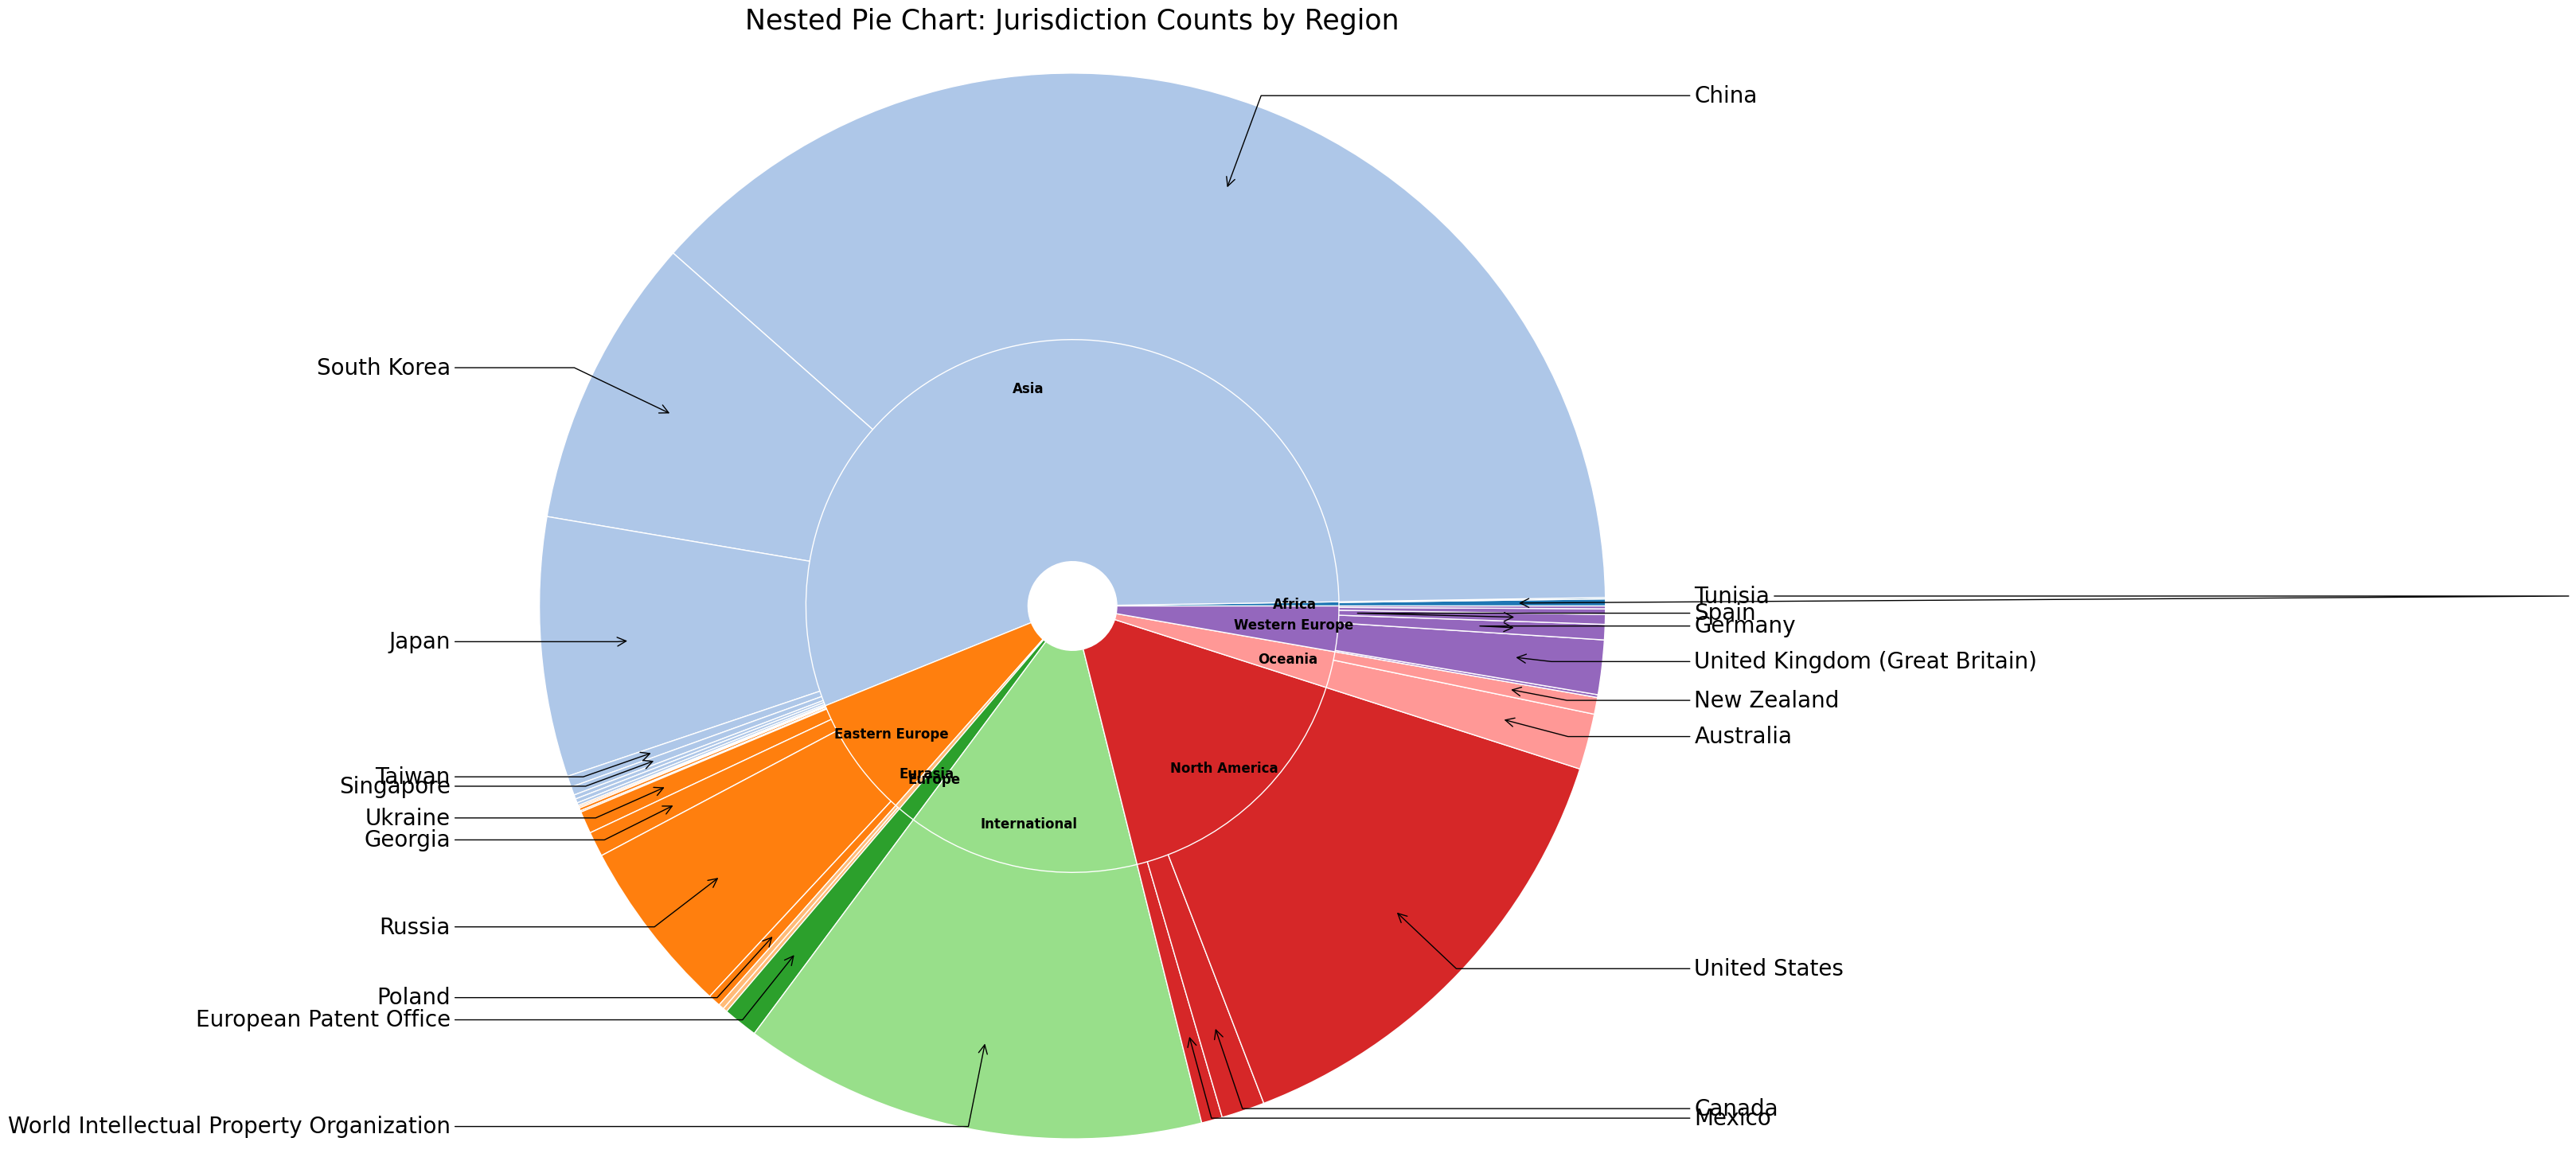

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


# Let's create the DataFrame from the provided data
#df = data.groupby(['Jurisdiction_Region', 'Jurisdiction_name']).size().reset_index(name='counts')
df = data.groupby(['Jurisdiction_Region', 'Jurisdiction_name']).size().reset_index(name='counts').sort_values(by=['Jurisdiction_Region', 'counts'], ascending=[True, False])

# Get a list of unique regions
regions = df['Jurisdiction_Region'].unique()

# Create a color map with a distinct color for each region
color_map = plt.get_cmap('tab20')(range(len(regions)))
region_colors = {region: color for region, color in zip(regions, color_map)}

# Map the color to each jurisdiction based on its region
df['color'] = df['Jurisdiction_Region'].map(region_colors)

# Group by region to get total counts per region
region_counts = df.groupby('Jurisdiction_Region')['counts'].sum().reset_index(name='region_counts').sort_values(by=['Jurisdiction_Region', 'region_counts'], ascending=[True, True])


# Group by region and jurisdiction to get counts for each jurisdiction
jurisdiction_counts = df.groupby(['Jurisdiction_Region', 'Jurisdiction_name']).sum().reset_index().sort_values(by=['Jurisdiction_Region', 'counts'], ascending=[True, False])


# Sort the jurisdiction_counts to ensure matching colors in the plot
jurisdiction_counts = jurisdiction_counts.sort_values(by='Jurisdiction_Region')


# Set the threshold for displaying labels on the outer pie chart
threshold = 4  # You can adjust this number as needed for your dataset

# Start plotting
fig, ax = plt.subplots(figsize=(18, 20), subplot_kw=dict(aspect="equal"))

# Inner Pie Chart: Regions
inner_pie_wedges, _ = ax.pie(
    region_counts['region_counts'],
    radius=.8,
    labeldistance=0.5,
    colors=[region_colors[region] for region in region_counts['Jurisdiction_Region']],
    wedgeprops=dict(width=0.7, edgecolor='w')
)

# Apply labels to the inner pie chart for regions
for wedge, label in zip(inner_pie_wedges, region_counts['Jurisdiction_Region']):
    angle = (wedge.theta2 - wedge.theta1) / 2 + wedge.theta1
    x = 0.5 * np.cos(np.deg2rad(angle))
    y = 0.5 * np.sin(np.deg2rad(angle))
    ax.text(x, y, label, horizontalalignment='center', verticalalignment='center', size=12, weight="bold")

# Outer Pie Chart: Jurisdiction names
outer_pie_wedges, _ = ax.pie(
    jurisdiction_counts['counts'],
    radius=1.2,
    colors=[region_colors[region] for region in jurisdiction_counts['Jurisdiction_Region']],
    wedgeprops=dict(width=0.6, edgecolor='w')
)

# Annotate outer pie chart slices
for i, (wedge, label) in enumerate(zip(outer_pie_wedges, jurisdiction_counts['Jurisdiction_name'])):
    ang = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    x = 1. * np.cos(np.deg2rad(ang))
    y = 1. * np.sin(np.deg2rad(ang))

    if jurisdiction_counts['counts'].iloc[i] > threshold:
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        ax.annotate(label, xy=(x, y), xytext=(1.4 * np.sign(x), 1.21 * y),
                    arrowprops=dict(arrowstyle="->", connectionstyle=connectionstyle),
                    horizontalalignment=horizontalalignment, size=20)

ax.set_title('Nested Pie Chart: Jurisdiction Counts by Region', fontsize=25, pad=20)

plt.show()

<ipython-input-151-24e86f008ce2>:24: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  jurisdiction_counts = df.groupby(['Jurisdiction_Region', 'Jurisdiction_name']).sum().reset_index().sort_values(by=['Jurisdiction_Region', 'counts'], ascending=[True, False])


TypeError: ignored

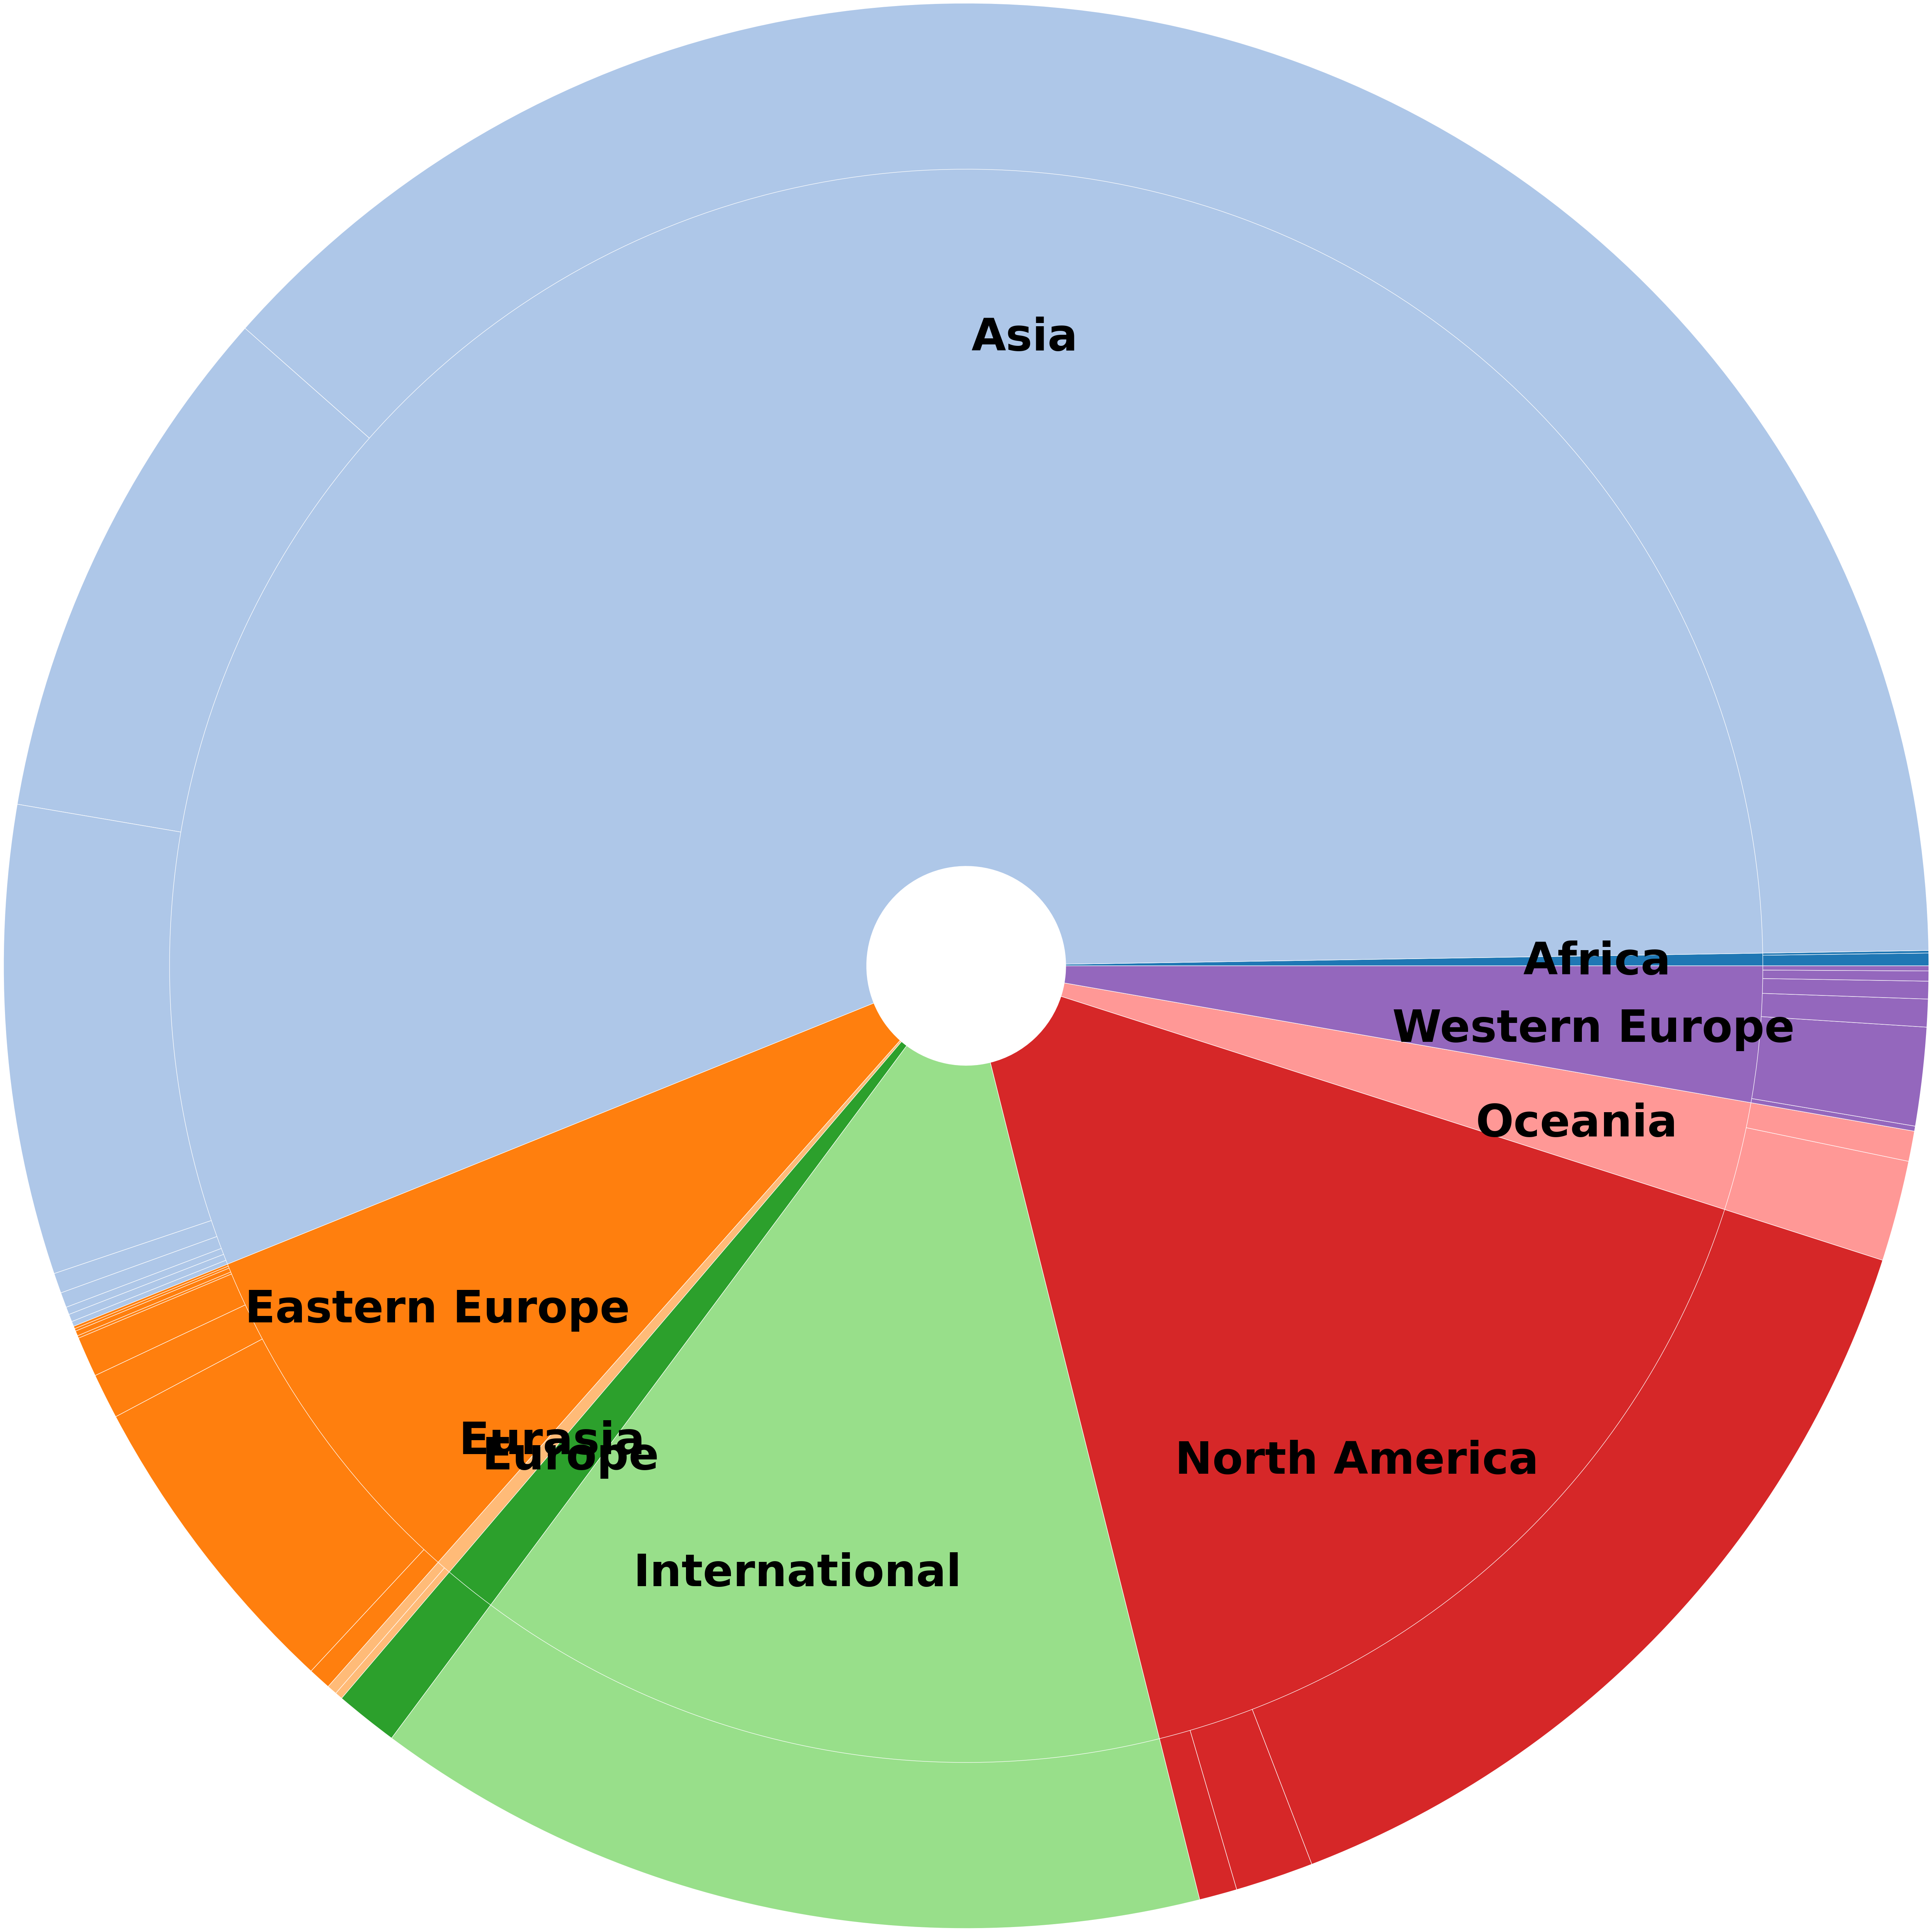

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


# Let's create the DataFrame from the provided data
#df = data.groupby(['Jurisdiction_Region', 'Jurisdiction_name']).size().reset_index(name='counts')
df = data.groupby(['Jurisdiction_Region', 'Jurisdiction_name']).size().reset_index(name='counts').sort_values(by=['Jurisdiction_Region', 'counts'], ascending=[True, False])

# Get a list of unique regions
regions = df['Jurisdiction_Region'].unique()

# Create a color map with a distinct color for each region
color_map = plt.get_cmap('tab20')(range(len(regions)))
region_colors = {region: color for region, color in zip(regions, color_map)}

# Map the color to each jurisdiction based on its region
df['color'] = df['Jurisdiction_Region'].map(region_colors)

# Group by region to get total counts per region
region_counts = df.groupby('Jurisdiction_Region')['counts'].sum().reset_index(name='region_counts').sort_values(by=['Jurisdiction_Region', 'region_counts'], ascending=[True, True])


# Group by region and jurisdiction to get counts for each jurisdiction
jurisdiction_counts = df.groupby(['Jurisdiction_Region', 'Jurisdiction_name']).sum().reset_index().sort_values(by=['Jurisdiction_Region', 'counts'], ascending=[True, False])


# Sort the jurisdiction_counts to ensure matching colors in the plot
jurisdiction_counts = jurisdiction_counts.sort_values(by='Jurisdiction_Region')


# Set the threshold for displaying labels on the outer pie chart
threshold = 4  # You can adjust this number as needed for your dataset

# Start plotting
fig, ax = plt.subplots(figsize=(30, 40), subplot_kw=dict(aspect="equal"))

# Inner Pie Chart: Regions
inner_pie_wedges, _ = ax.pie(
    region_counts['region_counts'],
    radius=2.6,
    labeldistance=0.3,
    colors=[region_colors[region] for region in region_counts['Jurisdiction_Region']],
    wedgeprops=dict(width=2.3, edgecolor='w')
)

# Apply labels to the inner pie chart for regions
for wedge, label in zip(inner_pie_wedges, region_counts['Jurisdiction_Region']):
    angle = (wedge.theta2 - wedge.theta1) / 2.4 + wedge.theta1
    x = 1.9 * np.cos(np.deg2rad(angle))
    y = 1.9 * np.sin(np.deg2rad(angle))
    ax.text(x, y, label, horizontalalignment='center', verticalalignment='center', size=90, weight="bold")

# Outer Pie Chart: Jurisdiction names
outer_pie_wedges, _ = ax.pie(
    jurisdiction_counts['counts'],
    radius=2.9,
    labeldistance=3.3,
    colors=[region_colors[region] for region in jurisdiction_counts['Jurisdiction_Region']],
    wedgeprops=dict(width=0.5, edgecolor='w')
)

radius = 5  # Adjust this value as needed

# Annotate outer pie chart slices
for i, (wedge, label) in enumerate(zip(outer_pie_wedges, jurisdiction_counts['Jurisdiction_name'])):
    ang = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    x = 1. * np.cos(np.deg2rad(ang))
    y = 1. * np.sin(np.deg2rad(ang))

    if jurisdiction_counts['counts'].iloc[i] > threshold:
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle3,angleA=0,angleB={ang},rad={radius}"
        ax.annotate(label, xy=(x, y), xytext=(2.9 * np.sign(x), 2.9 * y),
                    arrowprops=dict(arrowstyle="-", connectionstyle=connectionstyle),
                    horizontalalignment=horizontalalignment, size=120)

ax.set_title('Nested Pie Chart: Jurisdiction Counts by Region', fontsize=150, pad=1200)

plt.show()

## Trend of Jurisdiction Contributions by Region

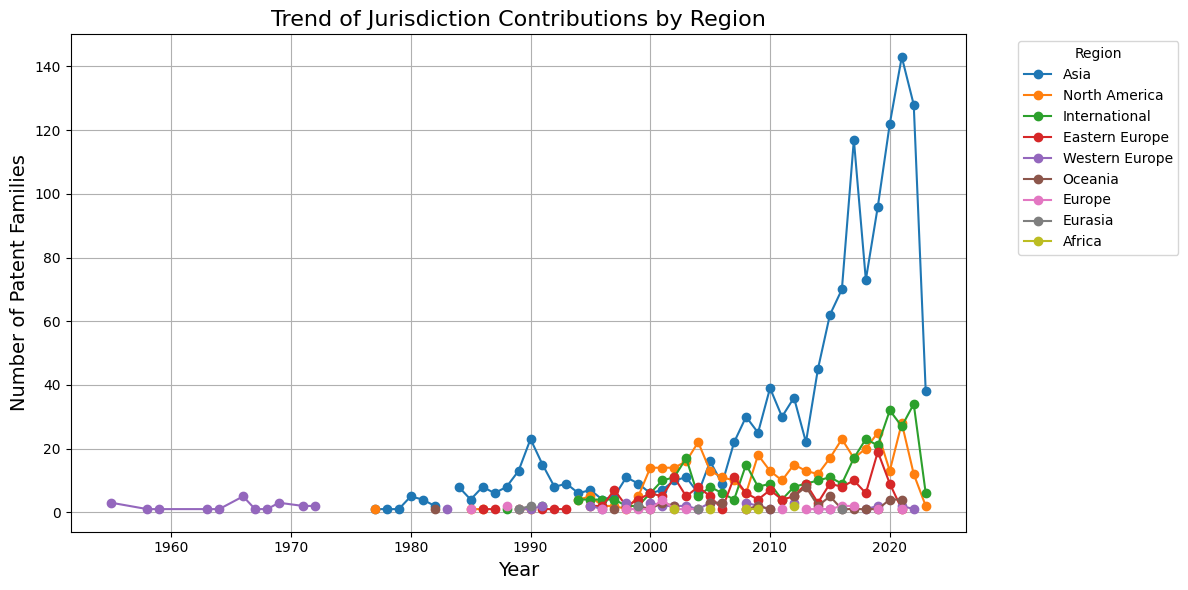

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named 'df' and it includes a 'Year' column to show trends over time.
# Here's an example structure of 'df':
# df = pd.DataFrame({
#     'Year': [2010, 2010, 2011, 2011, ...],
#     'Jurisdiction': ['RU', 'JP', 'RU', 'JP', ...],
#     'Jurisdiction_name': ['Russia', 'Japan', 'Russia', 'Japan', ...],
#     'Jurisdiction_Region': ['Europe', 'Asia', 'Europe', 'Asia', ...]
# })

# Group by Year and Region, count the occurrences, and reset index to make 'Year' and 'Jurisdiction_Region' columns again
trend_data = data.groupby(['Application Year', 'Jurisdiction_Region']).size().reset_index(name='Counts')

# Pivot the data to have years on the x-axis and regions as separate lines
trend_pivot = trend_data.pivot(index='Application Year', columns='Jurisdiction_Region', values='Counts')#.fillna(0)

# Sort the columns by their overall sum so that the largest area is at the bottom
sorted_regions = trend_pivot.sum().sort_values(ascending=False).index
trend_pivot = trend_pivot[sorted_regions]

# Plotting
plt.figure(figsize=(12, 6))

# Plot a line for each region
for region in trend_pivot.columns:
    plt.plot(trend_pivot.index, trend_pivot[region], marker='o', label=region)

# Add title and labels
plt.title('Trend of Jurisdiction Contributions by Region', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Patent Families', fontsize=14)

# Add legend
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show grid
plt.grid(True)

# Display the plot
plt.tight_layout()  # Adjust the layout to prevent clipping
plt.show()


## Stacked Trend of Jurisdiction Contributions by Region

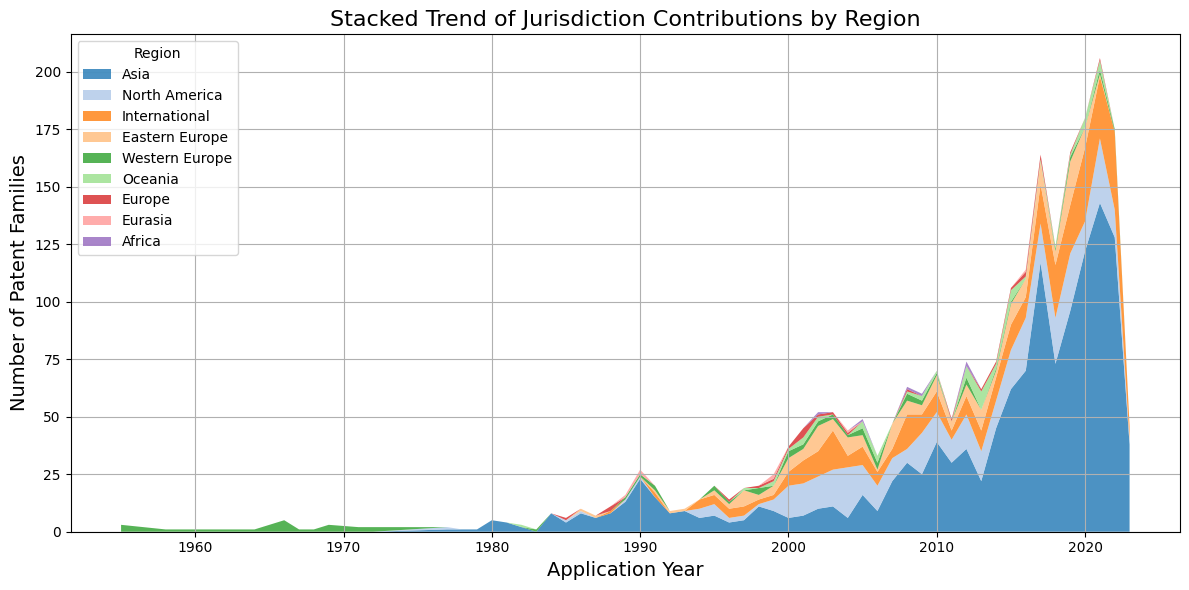

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import itertools

# Your DataFrame is assumed to be named 'df'.
# Number of jurisdictions
num_colors = len(trend_pivot.columns)

# Combine multiple color maps
cmaps = [plt.cm.tab20, plt.cm.Set3, plt.cm.Paired]  # Add more if needed
colors = list(itertools.chain.from_iterable([cmap(np.linspace(0, 1, cmap.N)) for cmap in cmaps]))

# If more colors are needed, generate custom colors
while len(colors) < num_colors:
    # Generate a random color
    random_color = mcolors.to_rgba(np.random.rand(4,))
    # Check for distinctiveness and add to the list
    if all(mcolors.colorConverter.to_rgb(random_color) != mcolors.colorConverter.to_rgb(existing_color) for existing_color in colors):
        colors.append(random_color)

# Ensure all data is numeric, converting 'Application Year' to a numeric type if necessary
data['Application Year'] = pd.to_numeric(data['Application Year'], errors='coerce')

# Drop rows with NaN in 'Application Year' after conversion
data.dropna(subset=['Application Year'], inplace=True)

# Group by 'Application Year' and 'Jurisdiction_Region', count the occurrences, and reset index
trend_data = data.groupby(['Application Year', 'Jurisdiction_Region']).size().reset_index(name='Counts')

# Pivot the data to have 'Application Year' as the index and 'Jurisdiction_Region' as the columns with their respective counts
trend_pivot = trend_data.pivot(index='Application Year', columns='Jurisdiction_Region', values='Counts').fillna(0)

# Convert the 'Application Year' index back to integer if it was changed to float during the process
trend_pivot.index = trend_pivot.index.astype(int)

# Sort the columns by their overall sum so that the largest area is at the bottom
sorted_regions = trend_pivot.sum().sort_values(ascending=False).index
trend_pivot = trend_pivot[sorted_regions]

# Plotting
plt.figure(figsize=(12, 6))

# Stackplot does the cumulative plot in one go, no need to cumsum manually
plt.stackplot(trend_pivot.index, trend_pivot.T, labels=trend_pivot.columns, colors = colors[:num_colors], alpha=0.8)

# Add title and labels
plt.title('Stacked Trend of Jurisdiction Contributions by Region', fontsize=16)
plt.xlabel('Application Year', fontsize=14)
plt.ylabel('Number of Patent Families', fontsize=14)

# Add legend
plt.legend(title='Region', loc='upper left') #, bbox_to_anchor=(1.05, 1))

# Show grid
plt.grid(True)

# Display the plot
plt.tight_layout()  # Adjust the layout to prevent clipping
plt.show()


## Stacked Trend of Jurisdiction Contributions by Region (Percentage)

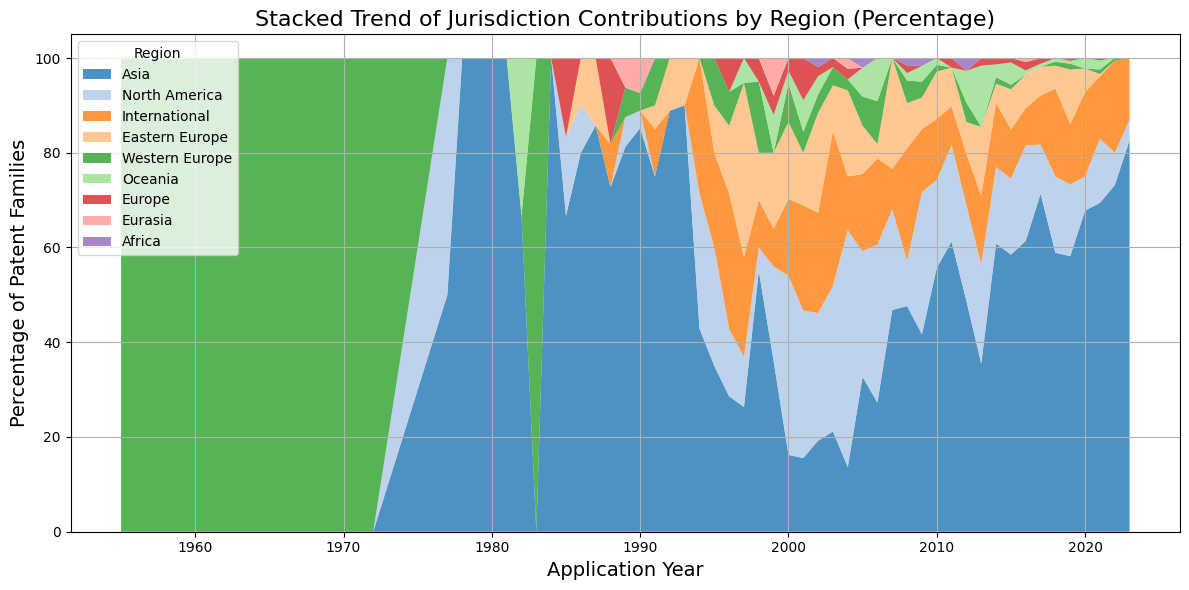

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import itertools

# Your DataFrame is assumed to be named 'data'.
# Calculate total counts for each jurisdiction
total_counts = data.groupby('Jurisdiction_Region').size()

# Sort jurisdictions by total counts
sorted_regions = total_counts.sort_values(ascending=False).index

# Number of jurisdictions
num_colors = len(trend_pivot.columns)

# Combine multiple color maps
cmaps = [plt.cm.tab20, plt.cm.Set3, plt.cm.Paired]  # Add more if needed
colors = list(itertools.chain.from_iterable([cmap(np.linspace(0, 1, cmap.N)) for cmap in cmaps]))

# If more colors are needed, generate custom colors
while len(colors) < num_colors:
    # Generate a random color
    random_color = mcolors.to_rgba(np.random.rand(4,))
    # Check for distinctiveness and add to the list
    if all(mcolors.colorConverter.to_rgb(random_color) != mcolors.colorConverter.to_rgb(existing_color) for existing_color in colors):
        colors.append(random_color)

# Ensure all data is numeric, converting 'Application Year' to a numeric type if necessary
data['Application Year'] = pd.to_numeric(data['Application Year'], errors='coerce')

# Drop rows with NaN in 'Application Year' after conversion
data.dropna(subset=['Application Year'], inplace=True)

# Group by 'Application Year' and 'Jurisdiction_Region', count the occurrences, and reset index
trend_data = data.groupby(['Application Year', 'Jurisdiction_Region']).size().reset_index(name='Counts')

# Pivot the data to have 'Application Year' as the index and 'Jurisdiction_Region' as the columns with their respective counts
trend_pivot = trend_data.pivot(index='Application Year', columns='Jurisdiction_Region', values='Counts').fillna(0)

# Convert counts to percentages of the row total (i.e., total counts for each year)
trend_pivot = trend_pivot.div(trend_pivot.sum(axis=1), axis=0) * 100

# Convert the 'Application Year' index back to integer if it was changed to float during the process
trend_pivot.index = trend_pivot.index.astype(int)

# Sort the columns by their overall sum so that the largest region is at the bottom
#sorted_regions = trend_pivot.sum().sort_values(ascending=False).index
trend_pivot = trend_pivot[sorted_regions]

# Plotting
plt.figure(figsize=(12, 6))

# Stackplot now plots percentages
plt.stackplot(trend_pivot.index, trend_pivot.T, labels=trend_pivot.columns, colors=colors[:num_colors], alpha=0.8)

# Add title and labels
plt.title('Stacked Trend of Jurisdiction Contributions by Region (Percentage)', fontsize=16)
plt.xlabel('Application Year', fontsize=14)
plt.ylabel('Percentage of Patent Families', fontsize=14)

# Add legend
plt.legend(title='Region', loc='upper left') #, bbox_to_anchor=(1.05, 1))

# Show grid
plt.grid(True)

# Display the plot
plt.tight_layout()  # Adjust the layout to prevent clipping
plt.show()


In [ ]:
trend_pivot.replace(0, '')

Jurisdiction_Region,Asia,North America,International,Eastern Europe,Western Europe,Oceania,Europe,Eurasia,Africa
Application Year,,,,,,,,,
1955,,,,,100.0,,,,
1958,,,,,100.0,,,,
1959,,,,,100.0,,,,
1963,,,,,100.0,,,,
1964,,,,,100.0,,,,
1966,,,,,100.0,,,,
1967,,,,,100.0,,,,
1968,,,,,100.0,,,,
1969,,,,,100.0,,,,


## Proportional Trend of Jurisdiction Contributions by Region

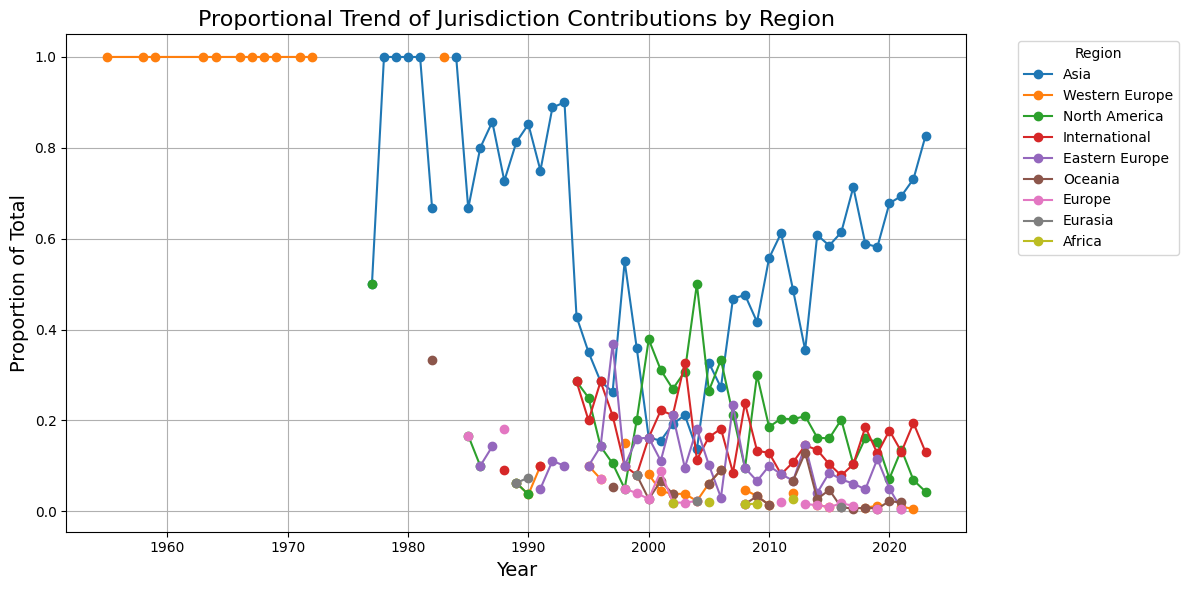

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named 'df' and it includes a 'Year' column to show trends over time.

# Group by Year and Region, count the occurrences, and reset index to make 'Year' and 'Jurisdiction_Region' columns again
trend_data = data.groupby(['Application Year', 'Jurisdiction_Region']).size().reset_index(name='Counts')

# Calculate total counts for each year
yearly_totals = trend_data.groupby('Application Year')['Counts'].transform('sum')

# Convert counts to proportions of the yearly total
trend_data['Proportion'] = trend_data['Counts'] / yearly_totals

# Pivot the data to have years on the x-axis and regions as separate lines
trend_pivot = trend_data.pivot(index='Application Year', columns='Jurisdiction_Region', values='Proportion')#.fillna(0)

# Sort the columns by their overall sum so that the largest area is at the bottom
sorted_regions = trend_pivot.sum().sort_values(ascending=False).index
trend_pivot = trend_pivot[sorted_regions]

# Plotting
plt.figure(figsize=(12, 6))

# Plot a line for each region
for region in trend_pivot.columns:
    plt.plot(trend_pivot.index, trend_pivot[region], marker='o', label=region)



# Add title and labels
plt.title('Proportional Trend of Jurisdiction Contributions by Region', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Proportion of Total', fontsize=14)

# Add legend
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show grid
plt.grid(True)

# Display the plot
plt.tight_layout()  # Adjust the layout to prevent clipping
plt.show()


## Yearly Trend of Patents Families for Leading Countries ////// 'Yearly Trend of Patents Families for Leading Countries

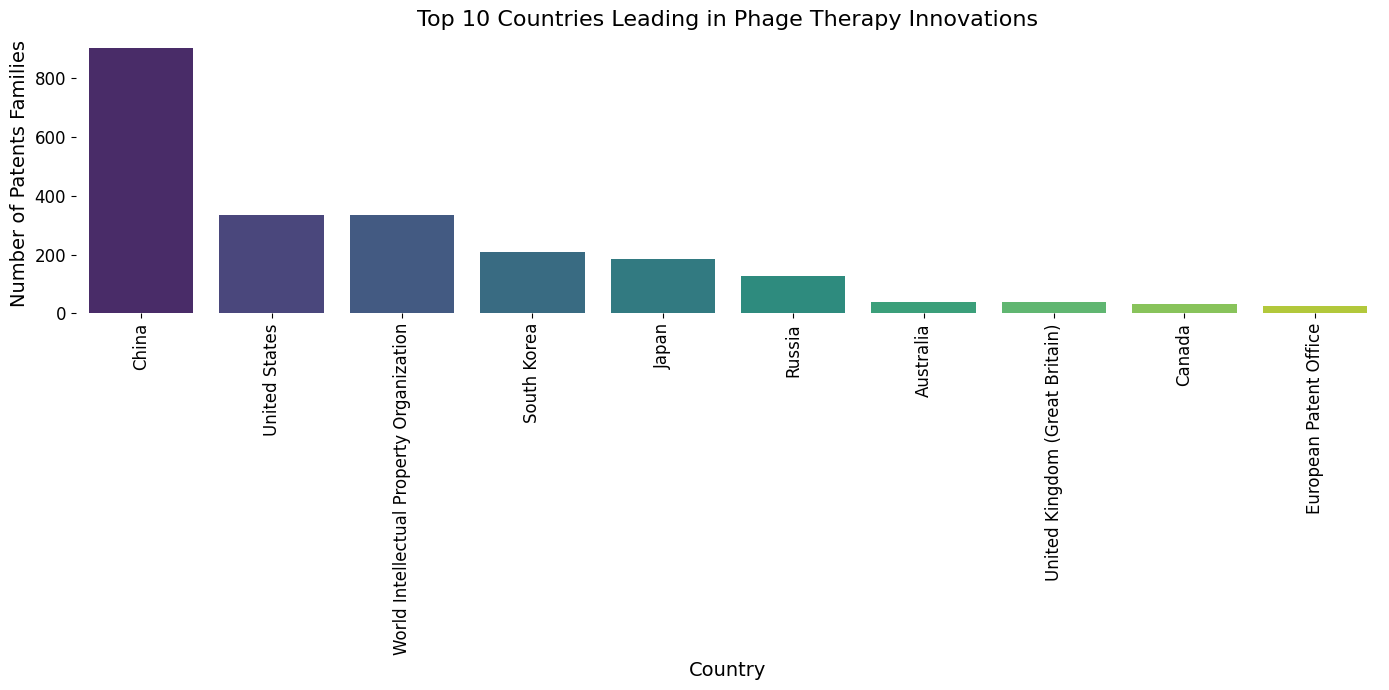

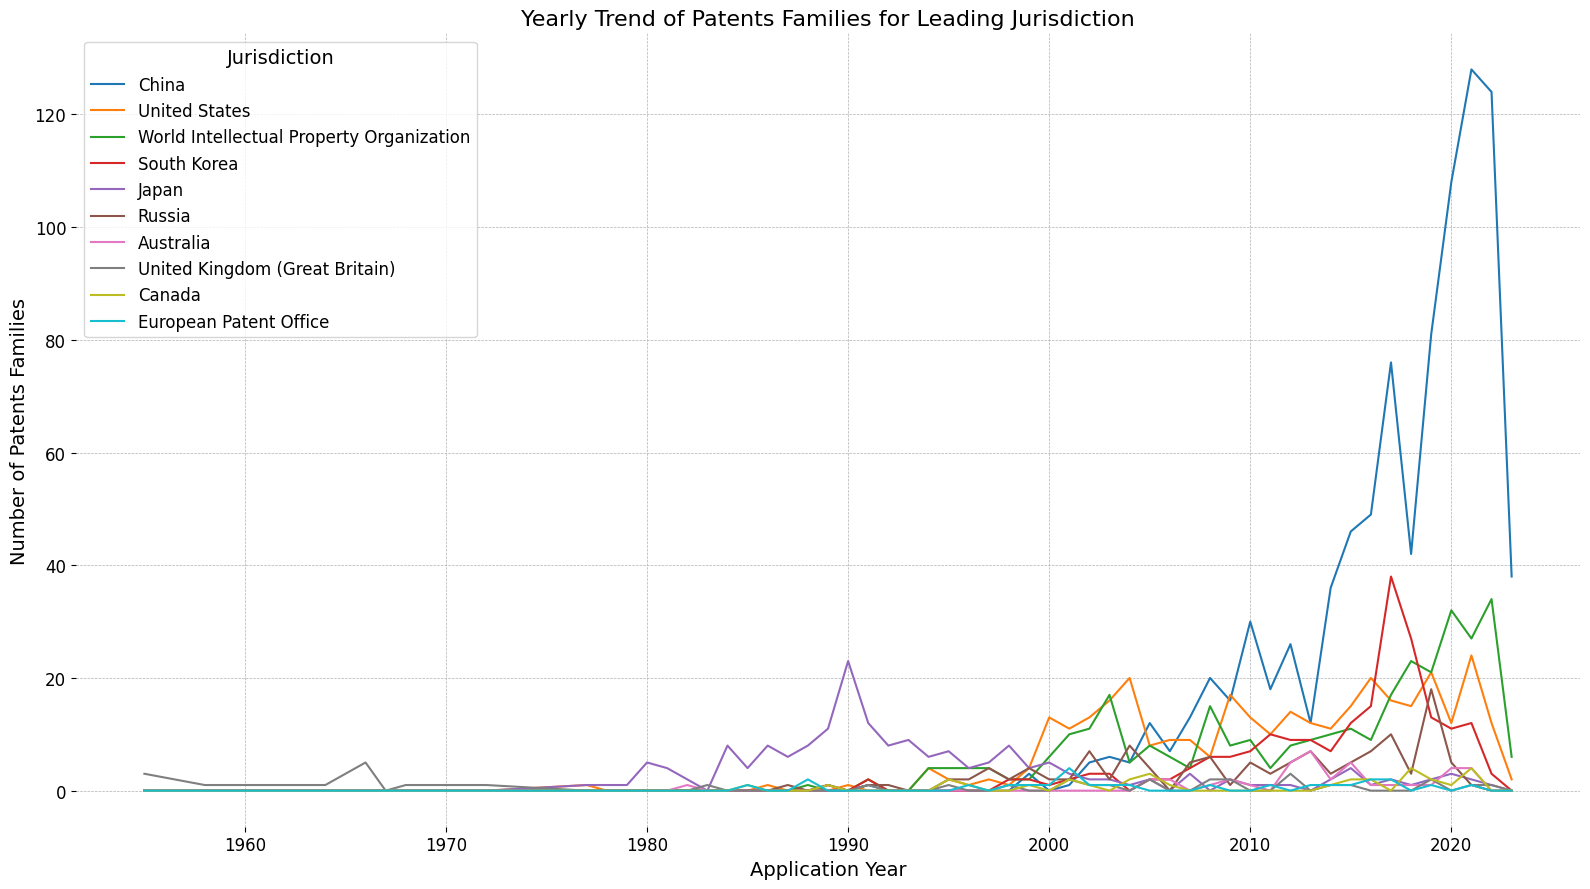

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming data is already loaded...

# Grouping patents by country
country_counts = data['Jurisdiction_name'].value_counts()

# Plotting the top 10 countries using seaborn
plt.figure(figsize=(14, 7))
sns.barplot(x=country_counts.head(10).index, y=country_counts.head(10).values, palette='viridis')
plt.title('Top 10 Countries Leading in Phage Therapy Innovations', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Patents Families', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
sns.despine(bottom=True, left=True)
plt.tight_layout()
plt.show()

# Assuming 'Application Date' column exists
data['Year'] = pd.to_datetime(data['Application Date']).dt.year
yearly_counts = data.groupby(['Year', 'Jurisdiction_name']).size().unstack().fillna(0)

# Top 10 countries
top_countries = country_counts.head(10)

# Plotting temporal trends for top countries using seaborn
plt.figure(figsize=(16, 9))
for country in top_countries.index:
    sns.lineplot(data=yearly_counts, x=yearly_counts.index, y=country, label=country)

plt.title('Yearly Trend of Patents Families for Leading Jurisdiction', fontsize=16)
plt.xlabel('Application Year', fontsize=14)
plt.ylabel('Number of Patents Families', fontsize=14)
plt.legend(title='Jurisdiction', fontsize=12, title_fontsize='14')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


In [ ]:
country_counts

China                                       904
United States                               336
World Intellectual Property Organization    333
South Korea                                 209
Japan                                       186
Russia                                      126
Australia                                    40
United Kingdom (Great Britain)               39
Canada                                       31
European Patent Office                       25
Georgia                                      18
Ukraine                                      16
Mexico                                       15
New Zealand                                  12
Germany                                      11
Poland                                        9
Taiwan                                        8
Spain                                         7
Singapore                                     6
Tunisia                                       5
Eurasian Patent Organization            

## Yearly Trend of Patent Families for the Top 10 Jurisdictions

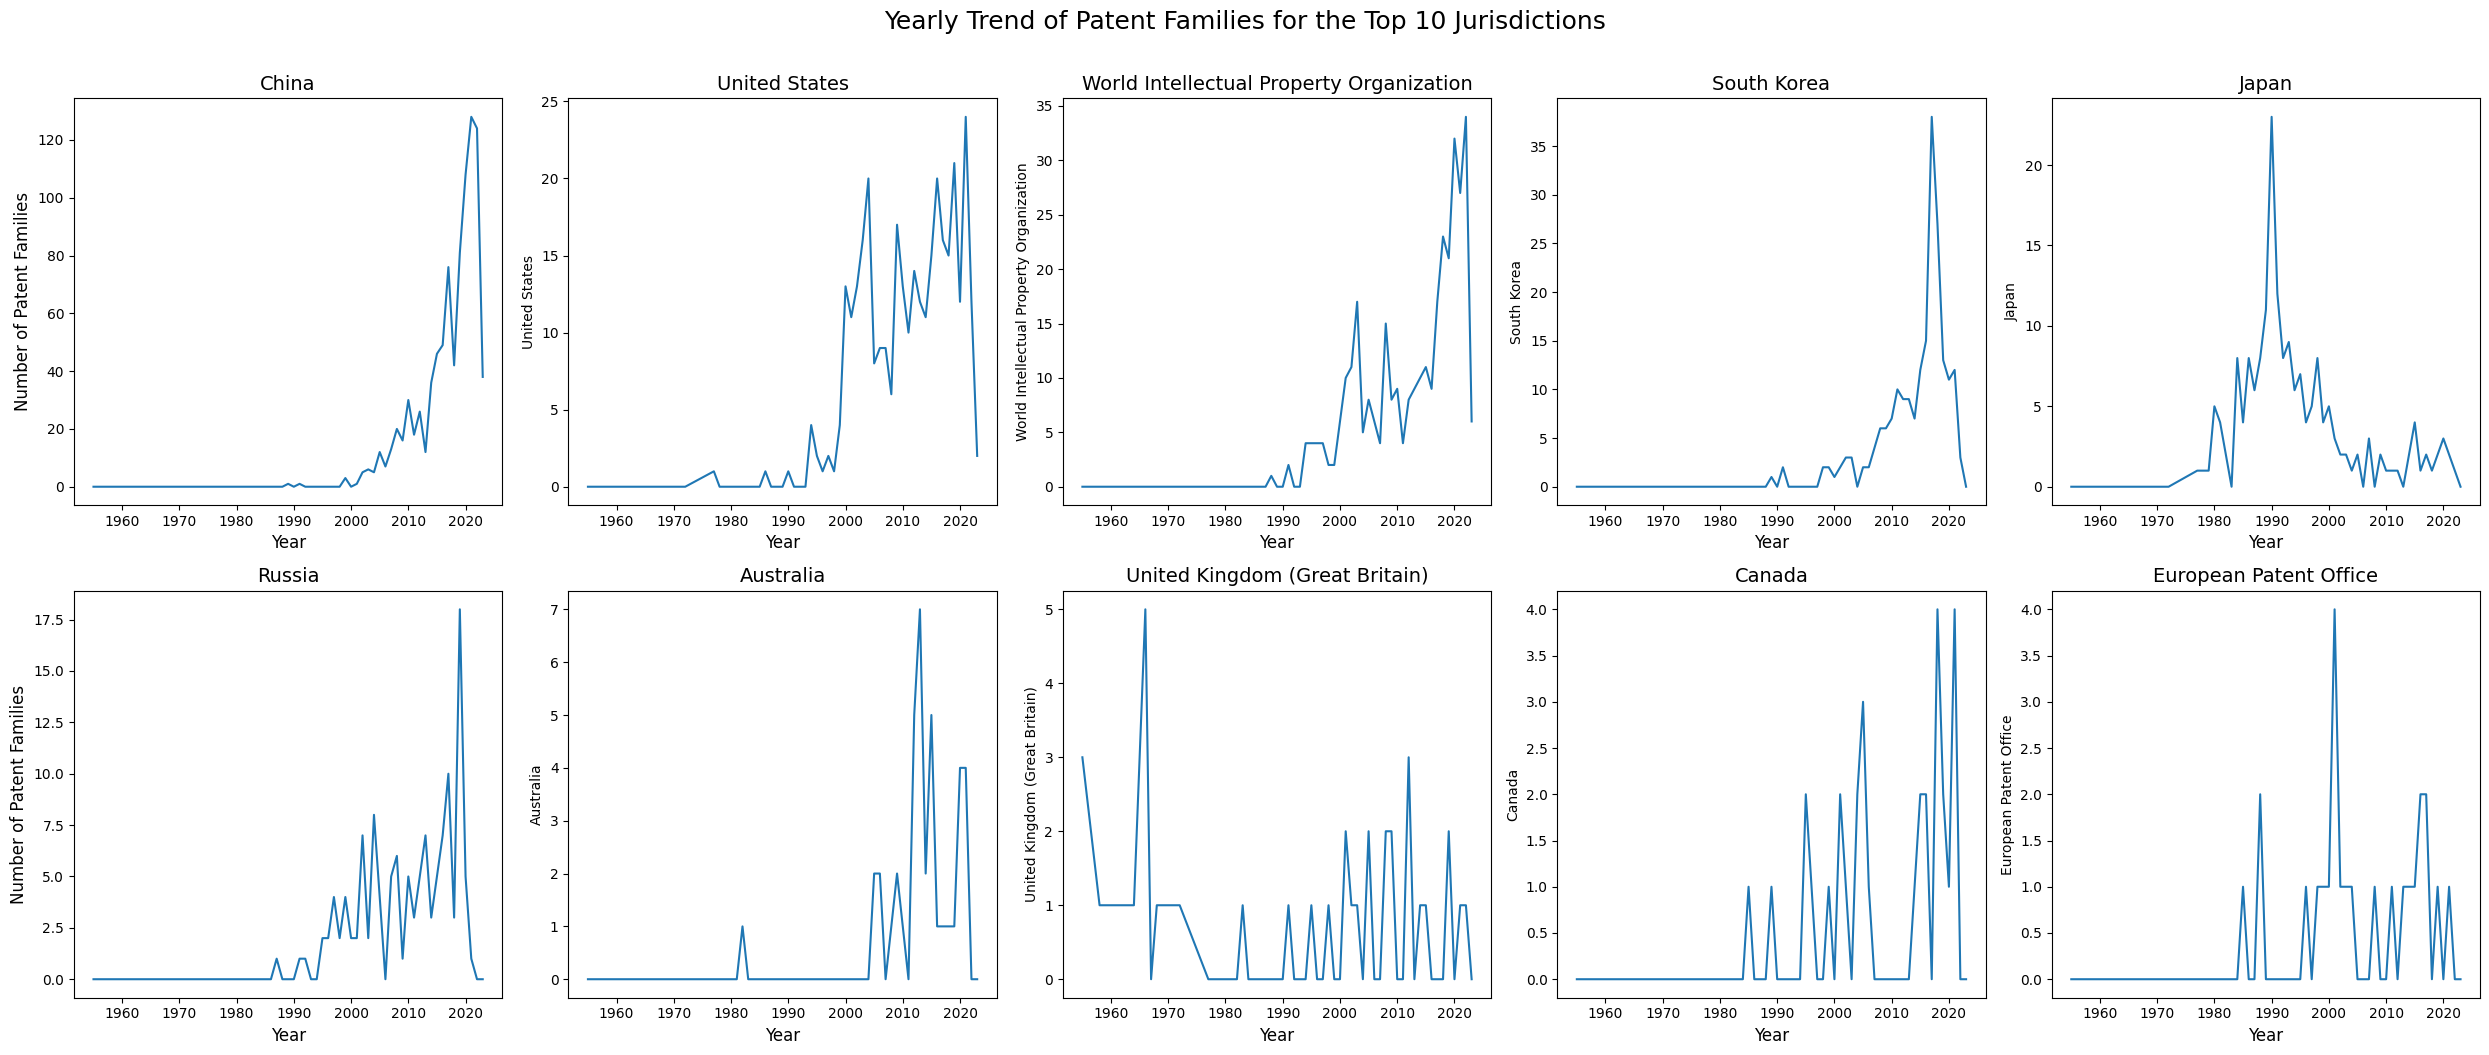

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming data is already loaded...

# Grouping patents by country
country_counts = data['Jurisdiction_name'].value_counts()

# Assuming 'Application Date' column exists and is in the correct date format
data['Year'] = pd.to_datetime(data['Application Date']).dt.year
yearly_counts = data.groupby(['Year', 'Jurisdiction_name']).size().unstack().fillna(0)

# Top 10 countries
top_countries = country_counts.head(10).index

# Plotting temporal trends for top countries using seaborn
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10))

# Enumerate over the top countries and create a lineplot for each
for i, country in enumerate(top_countries):
    row = i // 5  # Determine the row of the subplot
    col = i % 5   # Determine the column of the subplot
    ax = axes[row, col]  # Get the subplot axis

    # Plot on the appropriate subplot
    sns.lineplot(ax=ax, data=yearly_counts, x=yearly_counts.index, y=country)
    ax.set_title(country, fontsize=14)
    ax.set_xlabel('Year', fontsize=12)
    if col == 0:  # Only set y-label for the first column to reduce clutter
        ax.set_ylabel('Number of Patent Families', fontsize=12)
    ax.tick_params(labelsize=10)

# Adjusting the layout to prevent overlapping
plt.tight_layout()

# Add a general title
plt.suptitle('Yearly Trend of Patent Families for the Top 10 Jurisdictions', fontsize=18, y=1.05)

# Finally, show the plot
plt.show()


In [ ]:
yearly_counts.replace(0, '')

Jurisdiction_name,Australia,Bulgaria,Canada,China,Czech Republic,Eurasian Patent Organization,European Patent Office,France,Georgia,Germany,India,Japan,Latvia,Malaysia,Mexico,Netherlands,New Zealand,Philippines,Poland,Russia,Singapore,Slovakia,South Africa,South Korea,Soviet Union (historical),Spain,Switzerland,Taiwan,Tunisia,Ukraine,United Kingdom (Great Britain),United States,World Intellectual Property Organization
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1955,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,3.0,,
1958,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1.0,,
1959,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1.0,,
1963,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1.0,,
1964,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1.0,,
1966,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,5.0,,
1967,,,,,,,,,,,,,,,,,,,,,,,,,,,1.0,,,,,,
1968,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1.0,,
1969,,,,,,,,,,,,,,,,,,,,,,,,,,1.0,1.0,,,,1.0,,


## Stacked Trend of Jurisdiction Contributions

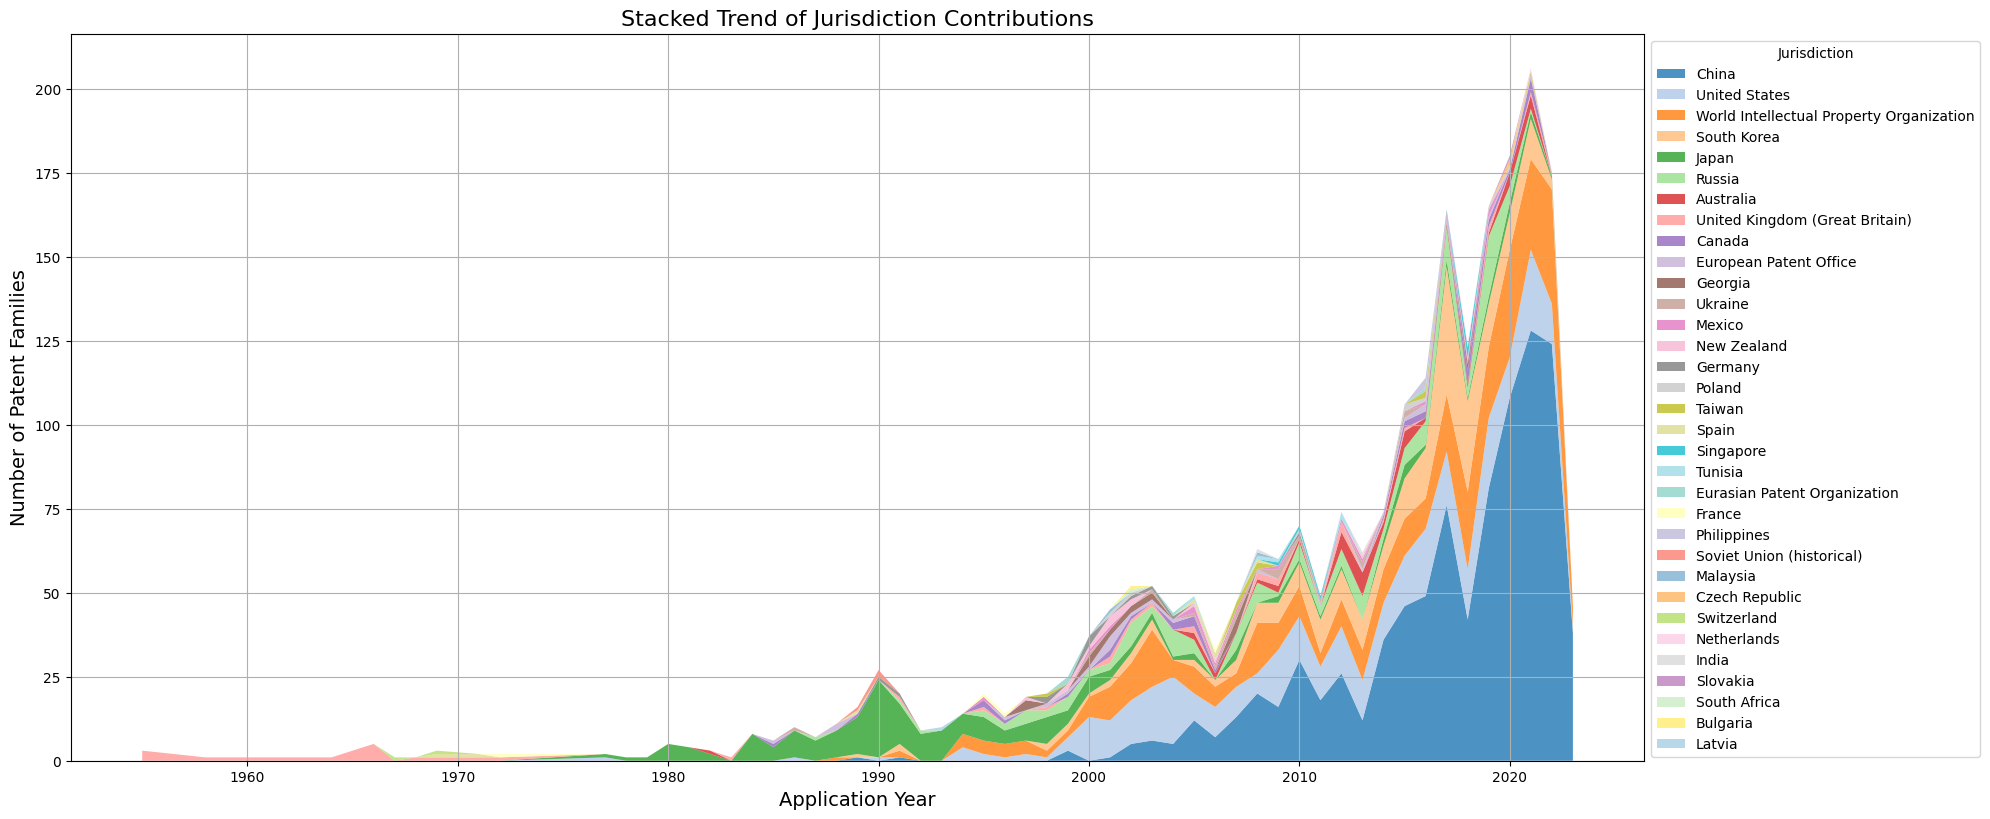

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import itertools

# Your DataFrame is assumed to be named 'df'.
# Number of jurisdictions
num_colors = len(yearly_counts.columns)

# Combine multiple color maps
cmaps = [plt.cm.tab20, plt.cm.Set3, plt.cm.Paired]  # Add more if needed
colors = list(itertools.chain.from_iterable([cmap(np.linspace(0, 1, cmap.N)) for cmap in cmaps]))

# If more colors are needed, generate custom colors
while len(colors) < num_colors:
    # Generate a random color
    random_color = mcolors.to_rgba(np.random.rand(4,))
    # Check for distinctiveness and add to the list
    if all(mcolors.colorConverter.to_rgb(random_color) != mcolors.colorConverter.to_rgb(existing_color) for existing_color in colors):
        colors.append(random_color)

# Ensure all data is numeric, converting 'Application Year' to a numeric type if necessary
data['Application Year'] = pd.to_numeric(data['Application Year'], errors='coerce')

# Drop rows with NaN in 'Application Year' after conversion
data.dropna(subset=['Application Year'], inplace=True)

# Group by 'Application Year' and 'Jurisdiction_name', count the occurrences, and reset index
trend_data = data.groupby(['Application Year', 'Jurisdiction_name']).size().reset_index(name='Counts')

# Pivot the data to have 'Application Year' as the index and 'Jurisdiction_name' as the columns with their respective counts
trend_pivot = trend_data.pivot(index='Application Year', columns='Jurisdiction_name', values='Counts').fillna(0)

# Convert the 'Application Year' index back to integer if it was changed to float during the process
trend_pivot.index = trend_pivot.index.astype(int)

# Sort the columns by their overall sum so that the largest area is at the bottom
sorted_regions = trend_pivot.sum().sort_values(ascending=False).index
trend_pivot = trend_pivot[sorted_regions]

# Plotting
plt.figure(figsize=(20, 8.5))

# Stackplot does the cumulative plot in one go, no need to cumsum manually
plt.stackplot(trend_pivot.index, trend_pivot.T, labels=trend_pivot.columns, colors=colors[:num_colors], alpha=0.8)

# Add title and labels
plt.title('Stacked Trend of Jurisdiction Contributions', fontsize=16)
plt.xlabel('Application Year', fontsize=14)
plt.ylabel('Number of Patent Families', fontsize=14)

# Add legend
plt.legend(title='Jurisdiction', loc='upper left', bbox_to_anchor=(1.0, 1))

# Show grid
plt.grid(True)

# Display the plot
plt.tight_layout()  # Adjust the layout to prevent clipping
plt.show()


In [ ]:
trend_pivot.replace(0, '')

Jurisdiction_name,China,United States,World Intellectual Property Organization,South Korea,Japan,Russia,Australia,United Kingdom (Great Britain),Canada,European Patent Office,Georgia,Ukraine,Mexico,New Zealand,Germany,Poland,Taiwan,Spain,Singapore,Tunisia,Eurasian Patent Organization,France,Philippines,Soviet Union (historical),Malaysia,Czech Republic,Switzerland,Netherlands,India,Slovakia,South Africa,Bulgaria,Latvia
Application Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1955,,,,,,,,3.0,,,,,,,,,,,,,,,,,,,,,,,,,
1958,,,,,,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,
1959,,,,,,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,
1963,,,,,,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,
1964,,,,,,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,
1966,,,,,,,,5.0,,,,,,,,,,,,,,,,,,,,,,,,,
1967,,,,,,,,,,,,,,,,,,,,,,,,,,,1.0,,,,,,
1968,,,,,,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,
1969,,,,,,,,1.0,,,,,,,,,,1.0,,,,,,,,,1.0,,,,,,


## Stacked Trend of Jurisdiction Contributions (Percentage)

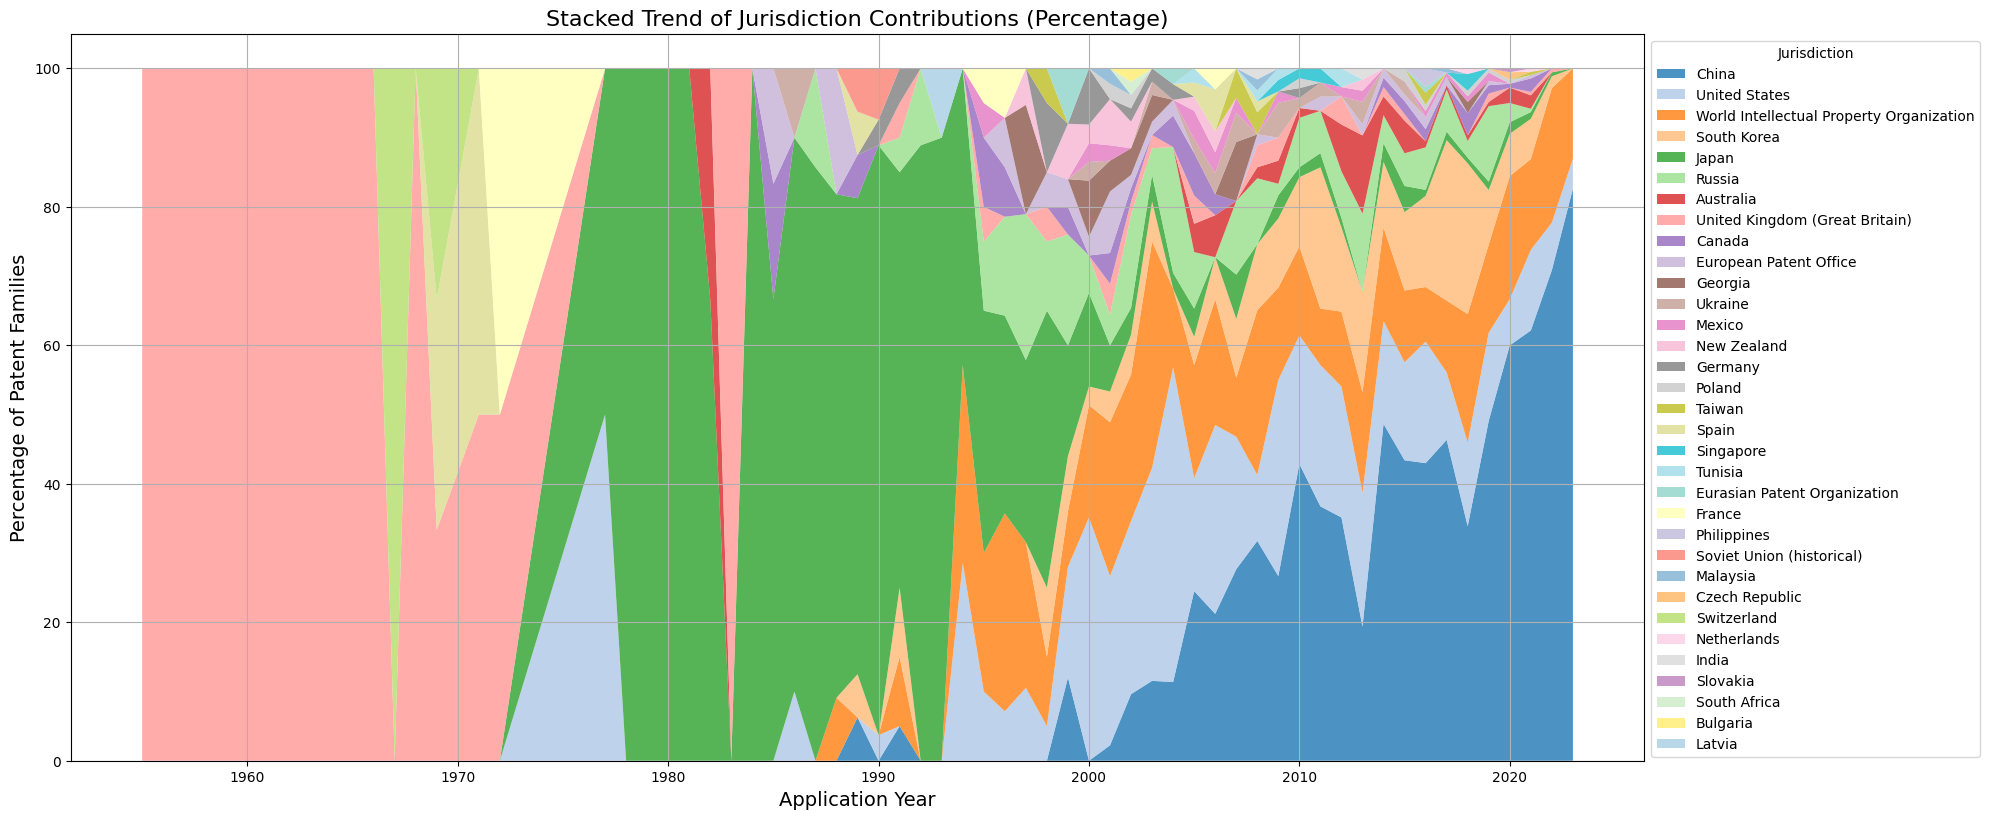

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import itertools

# Calculate total counts for each jurisdiction
total_counts = data.groupby('Jurisdiction_name').size()

# Sort jurisdictions by total counts
sorted_jurisdictions = total_counts.sort_values(ascending=False).index

# Rearrange the columns in 'trend_pivot' based on sorted jurisdictions
trend_pivot = trend_pivot[sorted_jurisdictions]

# Number of jurisdictions
num_colors = len(trend_pivot.columns)

# Combine multiple color maps
cmaps = [plt.cm.tab20, plt.cm.Set3, plt.cm.Paired]  # Add more if needed
colors = list(itertools.chain.from_iterable([cmap(np.linspace(0, 1, cmap.N)) for cmap in cmaps]))

# If more colors are needed, generate custom colors
while len(colors) < num_colors:
    # Generate a random color
    random_color = mcolors.to_rgba(np.random.rand(4,))
    # Check for distinctiveness and add to the list
    if all(mcolors.colorConverter.to_rgb(random_color) != mcolors.colorConverter.to_rgb(existing_color) for existing_color in colors):
        colors.append(random_color)


# Ensure all data is numeric, converting 'Application Year' to a numeric type if necessary
data['Application Year'] = pd.to_numeric(data['Application Year'], errors='coerce')

# Drop rows with NaN in 'Application Year' after conversion
data.dropna(subset=['Application Year'], inplace=True)

# Group by 'Application Year' and 'Jurisdiction_name', count the occurrences, and reset index
trend_data = data.groupby(['Application Year', 'Jurisdiction_name']).size().reset_index(name='Counts')

# Pivot the data to have 'Application Year' as the index and 'Jurisdiction_name' as the columns with their respective counts
trend_pivot = trend_data.pivot(index='Application Year', columns='Jurisdiction_name', values='Counts').fillna(0)

# Convert counts to percentages of the row total (i.e., total counts for each year)
trend_pivot = trend_pivot.div(trend_pivot.sum(axis=1), axis=0) * 100

# Convert the 'Application Year' index back to integer if it was changed to float during the process
trend_pivot.index = trend_pivot.index.astype(int)

# Sort the columns by their overall sum so that the largest region is at the bottom
#sorted_regions = trend_pivot.sum().sort_values(ascending=False).index
trend_pivot = trend_pivot[sorted_jurisdictions]

# Plotting
plt.figure(figsize=(20, 8.5))

# Stackplot now plots percentages
plt.stackplot(trend_pivot.index, trend_pivot.T, labels=trend_pivot.columns, colors=colors[:num_colors], alpha=0.8)

# Add title and labels
plt.title('Stacked Trend of Jurisdiction Contributions (Percentage)', fontsize=16)
plt.xlabel('Application Year', fontsize=14)
plt.ylabel('Percentage of Patent Families', fontsize=14)

# Add legend
plt.legend(title='Jurisdiction', loc='upper left', bbox_to_anchor=(1.0, 1))

# Show grid
plt.grid(True)

# Display the plot
plt.tight_layout()  # Adjust the layout to prevent clipping
plt.show()


In [ ]:
sorted_jurisdictions

Index(['China', 'United States', 'World Intellectual Property Organization',
       'South Korea', 'Japan', 'Russia', 'Australia',
       'United Kingdom (Great Britain)', 'Canada', 'European Patent Office',
       'Georgia', 'Ukraine', 'Mexico', 'New Zealand', 'Germany', 'Poland',
       'Taiwan', 'Spain', 'Singapore', 'Tunisia',
       'Eurasian Patent Organization', 'France', 'Philippines',
       'Soviet Union (historical)', 'Malaysia', 'Czech Republic',
       'Switzerland', 'Netherlands', 'India', 'Slovakia', 'South Africa',
       'Bulgaria', 'Latvia'],
      dtype='object', name='Jurisdiction_name')

In [ ]:
trend_pivot.replace(0, '')

Jurisdiction_name,China,United States,World Intellectual Property Organization,South Korea,Japan,Russia,Australia,United Kingdom (Great Britain),Canada,European Patent Office,Georgia,Ukraine,Mexico,New Zealand,Germany,Poland,Taiwan,Spain,Singapore,Tunisia,Eurasian Patent Organization,France,Philippines,Soviet Union (historical),Malaysia,Czech Republic,Switzerland,Netherlands,India,Slovakia,South Africa,Bulgaria,Latvia
Application Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1955,,,,,,,,100.0,,,,,,,,,,,,,,,,,,,,,,,,,
1958,,,,,,,,100.0,,,,,,,,,,,,,,,,,,,,,,,,,
1959,,,,,,,,100.0,,,,,,,,,,,,,,,,,,,,,,,,,
1963,,,,,,,,100.0,,,,,,,,,,,,,,,,,,,,,,,,,
1964,,,,,,,,100.0,,,,,,,,,,,,,,,,,,,,,,,,,
1966,,,,,,,,100.0,,,,,,,,,,,,,,,,,,,,,,,,,
1967,,,,,,,,,,,,,,,,,,,,,,,,,,,100.0,,,,,,
1968,,,,,,,,100.0,,,,,,,,,,,,,,,,,,,,,,,,,
1969,,,,,,,,33.333333,,,,,,,,,,33.333333,,,,,,,,,33.333333,,,,,,
